In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [4]:
import pandas as pd
netflix_data = pd.read_csv("new_netflix_datas.csv")
netflix_data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
1,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
2,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
3,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
4,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


In [5]:
user_data = pd.read_csv("fake_user_data.csv")
user_data.head(10)

,User ID,Username,Country,Watched Title,Age,Date Watched,Percentage Watched
0,1,henryjohnny,Azerbaijan,Kingdom,51,2022-12-02,77
1,1,henryjohnny,Azerbaijan,Holidate,51,2020-05-11,39
2,1,henryjohnny,Azerbaijan,Holly Star,51,2021-08-14,85
3,1,henryjohnny,Azerbaijan,The Panti Sisters,51,2021-12-24,54
4,1,henryjohnny,Azerbaijan,Dream/Killer,51,2021-06-08,66
5,1,henryjohnny,Azerbaijan,Well Done Abba,51,2019-12-25,58
6,1,henryjohnny,Azerbaijan,An Ordinary Man,51,2019-11-17,7
7,1,henryjohnny,Azerbaijan,Puss in Boots,51,2020-07-06,29
8,1,henryjohnny,Azerbaijan,Boi,51,2021-11-28,1
9,1,henryjohnny,Azerbaijan,Je Suis Karl,51,2019-10-22,35


In [6]:
# adding genres in fake user data according to title
genre = netflix_data[['title', 'listed_in']]
user_data['genres'] = user_data['Watched Title'].map(genre.set_index('title')['listed_in'])
user_data.head(5)

,User ID,Username,Country,Watched Title,Age,Date Watched,Percentage Watched,genres
0,1,henryjohnny,Azerbaijan,Kingdom,51,2022-12-02,77,"International TV Shows, Korean TV Shows, TV Ac..."
1,1,henryjohnny,Azerbaijan,Holidate,51,2020-05-11,39,"Comedies, Romantic Movies"
2,1,henryjohnny,Azerbaijan,Holly Star,51,2021-08-14,85,"Children & Family Movies, Comedies, Romantic M..."
3,1,henryjohnny,Azerbaijan,The Panti Sisters,51,2021-12-24,54,"Comedies, International Movies, LGBTQ Movies"
4,1,henryjohnny,Azerbaijan,Dream/Killer,51,2021-06-08,66,Documentaries


In [7]:
#I add new column for how many days have passed since then
from datetime import datetime
user_data['Date Watched'] = pd.to_datetime(user_data['Date Watched'])
today = datetime.now()
user_data['Days Since Watched'] = (today - user_data['Date Watched']).dt.days
user_data.head(5)

,User ID,Username,Country,Watched Title,Age,Date Watched,Percentage Watched,genres,Days Since Watched
0,1,henryjohnny,Azerbaijan,Kingdom,51,2022-12-02,77,"International TV Shows, Korean TV Shows, TV Ac...",187
1,1,henryjohnny,Azerbaijan,Holidate,51,2020-05-11,39,"Comedies, Romantic Movies",1122
2,1,henryjohnny,Azerbaijan,Holly Star,51,2021-08-14,85,"Children & Family Movies, Comedies, Romantic M...",662
3,1,henryjohnny,Azerbaijan,The Panti Sisters,51,2021-12-24,54,"Comedies, International Movies, LGBTQ Movies",530
4,1,henryjohnny,Azerbaijan,Dream/Killer,51,2021-06-08,66,Documentaries,729


In [8]:
user_data.shape

(11948, 9)

In [9]:
#check null
null_values = user_data.isnull().sum()
print(null_values)

User ID               0
Username              0
Country               0
Watched Title         0
Age                   0
Date Watched          0
Percentage Watched    0
genres                0
Days Since Watched    0
dtype: int64


**K Means Algorithm**

In [10]:
#normalize data
from sklearn.preprocessing import StandardScaler
k_means_data = user_data.copy()
scaler = StandardScaler()
numerical_cols = ['Age', 'Days Since Watched']
scaler.fit(k_means_data[numerical_cols])
scaled_data = scaler.transform(k_means_data[numerical_cols])
scaled_data

array([[ 0.14114535, -1.3121945 ],
       [ 0.14114535,  0.92074993],
       [ 0.14114535, -0.17781097],
       ...,
       [ 1.31279033,  0.99717156],
       [ 1.31279033,  1.43181956],
       [ 1.31279033, -0.60290627]])

In [11]:
#creates for each value of K the corresponding KMeans model and saves its inertia along with the actual K value.
from sklearn.cluster import KMeans
def find_best_clusters(df, maximum_K):
    
    clusters_centers = []
    k_values = []
    
    for k in range(1, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)
        
        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)
        
    
    return clusters_centers, k_values

In [12]:
#uses those inertias and K values to generate the final Elbow plot.
import matplotlib.pyplot as plt
def generate_elbow_plot(clusters_centers, k_values):
    
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

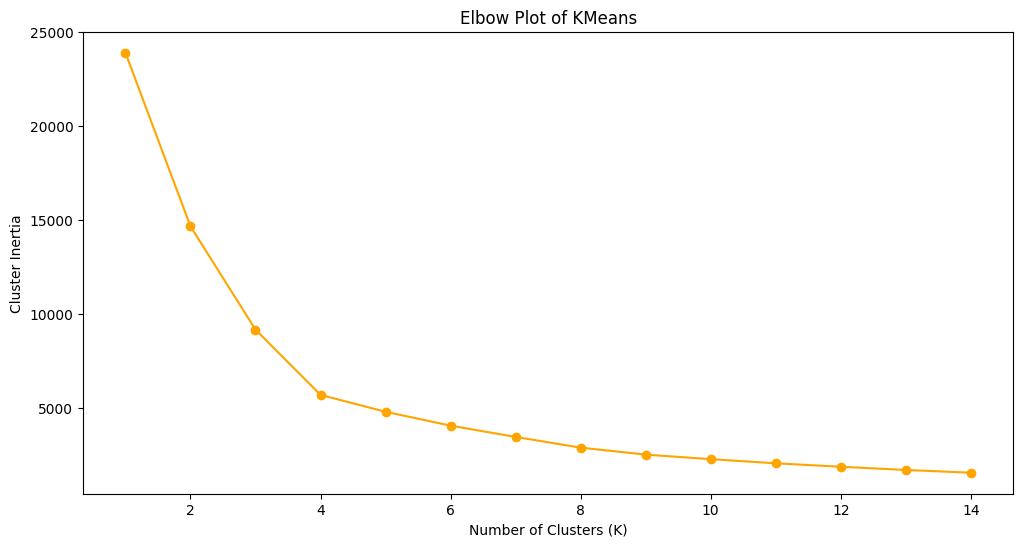

In [13]:
#find the optimal number of K using elbow method
clusters_centers, k_values = find_best_clusters(scaled_data, 15)

generate_elbow_plot(clusters_centers, k_values)

In [14]:
#drop the inertia is minimal after K=4 hence 4 can be considered as the optimal number of clusters.
#create the model

kmeans_model = KMeans(n_clusters = 4)

kmeans_model.fit(scaled_data)

#add clusters to df
k_means_data["clusters"] = kmeans_model.labels_

k_means_data.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,User ID,Username,Country,Watched Title,Age,Date Watched,Percentage Watched,genres,Days Since Watched,clusters
0,1,henryjohnny,Azerbaijan,Kingdom,51,2022-12-02,77,"International TV Shows, Korean TV Shows, TV Ac...",187,1
1,1,henryjohnny,Azerbaijan,Holidate,51,2020-05-11,39,"Comedies, Romantic Movies",1122,3
2,1,henryjohnny,Azerbaijan,Holly Star,51,2021-08-14,85,"Children & Family Movies, Comedies, Romantic M...",662,1
3,1,henryjohnny,Azerbaijan,The Panti Sisters,51,2021-12-24,54,"Comedies, International Movies, LGBTQ Movies",530,1
4,1,henryjohnny,Azerbaijan,Dream/Killer,51,2021-06-08,66,Documentaries,729,1


Text(0, 0.5, 'Days Since Watched')

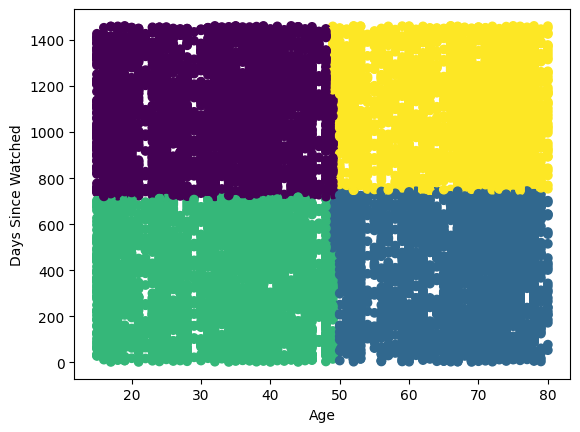

In [15]:
#plot clusters
plt.scatter(k_means_data["Age"], 
            k_means_data["Days Since Watched"], 
            c = k_means_data["clusters"])
plt.xlabel("Age")
plt.ylabel("Days Since Watched")

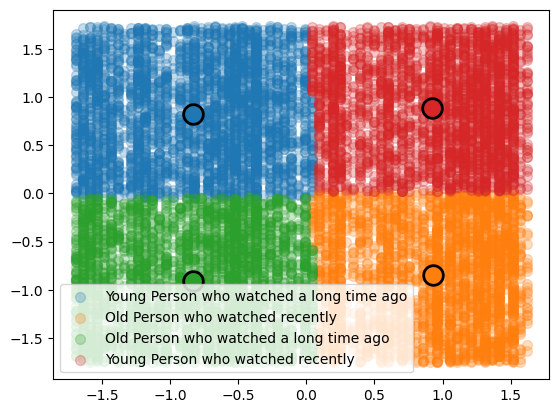

In [18]:
#scaler k means
import matplotlib.cm as cm
from itertools import cycle
X = scaled_data
colors = cycle(cm.tab10.colors)
y_kmeans = kmeans_model.predict(X)
centers = kmeans_model.cluster_centers_

plt.figure()
labels = {0: "Young Person who watched a long time ago", 1: "Old Person who watched recently", 2: "Old Person who watched a long time ago", 3: "Young Person who watched recently"}
for i in range(4):
    # plot one cluster for each iteration
    color = next(colors)
    # find indeces corresponding to cluser i
    idx = y_kmeans == i
    # plot cluster
    plt.scatter(X[idx, 0], X[idx, 1], color=color, s=50, label=labels[i], alpha=0.25)
    # plot center
    plt.scatter(centers[i, 0], centers[i, 1], edgecolors="k", linewidth=2, color=color, s=200, alpha=1)
plt.legend()

In [19]:
def get_user_genres(username):
    shows = k_means_data[k_means_data['Username'] == username]

    #separates genres with commas and determines what type of movie the user watches
    genres = list(set(genre for genres in shows['genres'].str.split(',') for genre in genres))
    
    return genres

In [20]:
import random
def get_recommend_movie(username):
    user_data = k_means_data[k_means_data['Username'] == username]
    cluster = user_data['clusters'].values[0]
    shows = set(user_data['Watched Title'].values)
    
    #In order to make a suggestion, it must be in the same cluster with a different username and the same movie type.
    user_clusters = k_means_data[(k_means_data['clusters'] == cluster) &
                                 (k_means_data['Username'] != username) &
                                 (k_means_data['genres'].isin(get_user_genres(username)))]

    cluster_shows = user_clusters['Watched Title'].values

    recommendations = [show for show in cluster_shows if show not in shows]
    random.shuffle(recommendations)

    return recommendations[:5]

In [21]:
#test
random_username = random.choice(k_means_data['Username'].values)
recommendations = get_recommend_movie(random_username)
print("username: ",random_username)
recommendations

username:  stephenjones


['The Ice Road',
 'Thiago Ventura: POKAS',
 "Sarah Cooper: Everything's Fine",
 "Jack Whitehall: I'm Only Joking",
 'Only Mine']

In [23]:
import pickle
# pickle
pickle.dump(k_means_data, open('k_means_model.pkl', 'wb'))